In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV as rcv
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from IPython import get_ipython

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import yfinance as yf

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [31]:
SPY_data = yf.download('SPY', start='2014-1-1', end='2024-1-1', auto_adjust=True)
dataframe = SPY_data[['Open', 'High', 'Low', 'Close']]
print(dataframe)

[*********************100%***********************]  1 of 1 completed

Price             Open        High         Low       Close
Ticker             SPY         SPY         SPY         SPY
Date                                                      
2014-01-02  150.708852  150.782586  149.480114  149.840546
2014-01-03  150.094490  150.397587  149.603002  149.815979
2014-01-06  150.307490  150.364824  149.152472  149.381836
2014-01-07  149.979845  150.553254  149.865163  150.299316
2014-01-08  150.274730  150.586014  149.816003  150.332077
...                ...         ...         ...         ...
2023-12-22  465.080521  466.572378  462.960567  464.874420
2023-12-26  465.286628  467.750103  465.208094  466.837341
2023-12-27  466.631275  467.828672  466.091477  467.681458
2023-12-28  468.044545  468.702115  467.436037  467.858063
2023-12-29  467.661792  468.191796  464.530893  466.503662

[2516 rows x 4 columns]


In [32]:
dataframe['Open-Close'] = dataframe.Open - dataframe.Close
dataframe['High-Low'] = dataframe.High - dataframe.Low
dataframe = dataframe.dropna()
X = dataframe[['Open-Close', 'High-Low']]
X.head()

Price,Open-Close,High-Low
Ticker,,
Date,,
2014-01-02,0.868306,1.302472
2014-01-03,0.278511,0.794585
2014-01-06,0.925654,1.212352
2014-01-07,-0.319472,0.688091
2014-01-08,-0.057347,0.770012


In [33]:
Y = np.where(dataframe['Close'].shift(-1) > dataframe['Close'], 1, -1)

In [34]:
split_percentage = 0.8
split = int(split_percentage*len(dataframe))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [35]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.66
Test_data Accuracy: 0.52


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


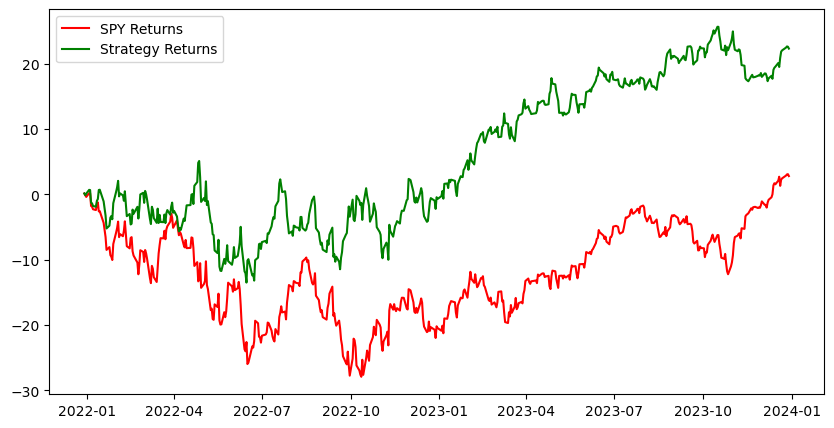

In [36]:
dataframe['Predicted_Signal'] = knn.predict(X)

dataframe['SPY_data_returns'] = np.log(dataframe['Close']/dataframe['Close'].shift(1))
Cumulative_SPY_data_returns = dataframe[split:]['SPY_data_returns'].cumsum()*100

dataframe['Strategy_returns'] = dataframe['SPY_data_returns']* dataframe['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = dataframe[split:]['Strategy_returns'].cumsum()*100


plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_data_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [37]:
Std = Cumulative_Strategy_returns.std()
Sharpe_ratio = (Cumulative_Strategy_returns - Cumulative_SPY_data_returns)/Std
Sharpe_ratio = Sharpe_ratio.mean()
print('Sharpe ratio: %.2f'%Sharpe_ratio )

Sharpe ratio: 1.61
